# Principal Component Analysis

In [1]:
# imoprt library
import pandas as pd
import numpy as np

In [2]:
import scipy.io as sio
mat_data = sio.loadmat(r"D:\Downloads\ex7faces.mat")

In [3]:
X=mat_data['X']

### (i) Normalize the features given in the dataset

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
X_std=StandardScaler()
X_st=X_std.fit_transform(X)

In [6]:
# 2nd method to normalise data
X_mean=np.mean(X)
X_std=np.std(X)
X_norm=(X-X_mean)/X_std

### i) Run principal component analysis on the given dataset.

In [7]:
from sklearn.decomposition import PCA

In [8]:
model=PCA(n_components=1024)
pca_model=model.fit_transform(X_st)

In [9]:
print("Orignal shape:-",X_st.shape)
print("Reduced shape:-",pca_model.shape)

Orignal shape:- (5000, 1024)
Reduced shape:- (5000, 1024)


In [11]:
EV=model.n_components
VR=model.explained_variance_ratio_
CVR=np.cumsum(VR)

In [12]:
import matplotlib.pyplot as plt

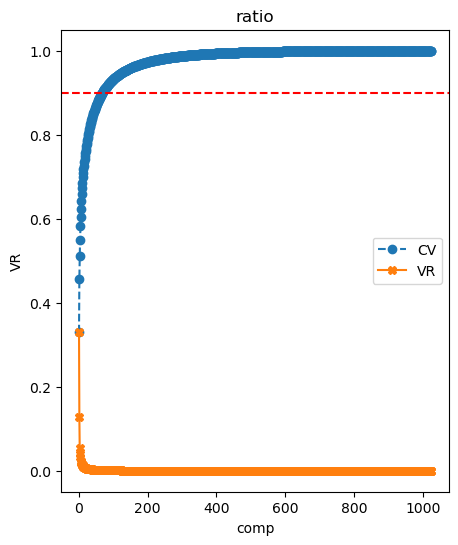

In [16]:
plt.figure(figsize=(5,6))
plt.plot(range(1,len(VR)+1),CVR,marker='o',linestyle='--',label='CV')
plt.plot(range(1,len(VR)+1),VR,marker='X',linestyle='-',label='VR')
plt.title("ratio")
plt.xlabel('comp')
plt.ylabel("VR")
plt.axhline(y=0.90,color='r',linestyle='--')
plt.legend()
plt.show()

### iii) Project the given data to the top 𝑘 eigenvectors.

In [10]:
eigenvector=model.n_components

varinace=model.explained_variance_ratio_

cumulative_variance = np.cumsum(varinace)


In [43]:
import matplotlib.pyplot as plt

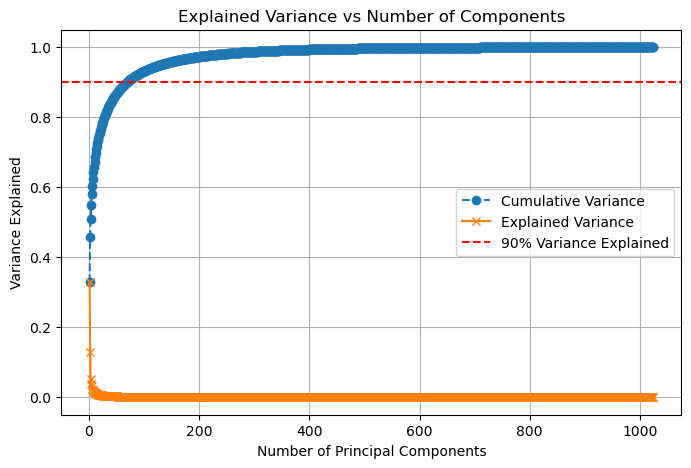

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varinace) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance')
plt.plot(range(1, len(varinace) + 1), varinace, marker='x', linestyle='-', label='Explained Variance')

plt.title('Explained Variance vs Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Explained')  # Example threshold
plt.legend()
plt.grid()
plt.show()

**Elbow Point**
- The "elbow" of the cumulative variance curve indicates the number of components that capture most of the variance.  
- This point is where the curve starts flattening, signaling diminishing returns in explained variance with additional components.  
- For example, if the elbow appears at 10 components, you can reduce your dataset to these 10 dimensions without losing much information.

** Optimal Components for 90% Variance **
- To determine the optimal number of components, identify the point on the plot where the cumulative variance explained crosses the 90% threshold (indicated by a red dashed line).  
- If this occurs at 20 components, it means that these 20 components capture most of the dataset's variability.

**Diminishing Returns**
- Beyond the elbow or the chosen variance threshold, adding more components does not significantly increase the explained variance.  
- Retaining these extra components might introduce noise or redundancy into your data rather than providing meaningful insights.


- **If aiming for a 90% variance threshold**: Retain the number of components where the cumulative variance curve crosses the red dashed line.  
- **If focusing on simplicity**: Retain the number of components at the elbow point, as this captures most of the variance with minimal complexity.


In [47]:
model2=PCA(n_components=10)
pca_model2=model2.fit_transform(X_st)

eigenvector2=model2.n_components

varinace2=model2.explained_variance_ratio_

cumulative_variance2 = np.cumsum(varinace2)


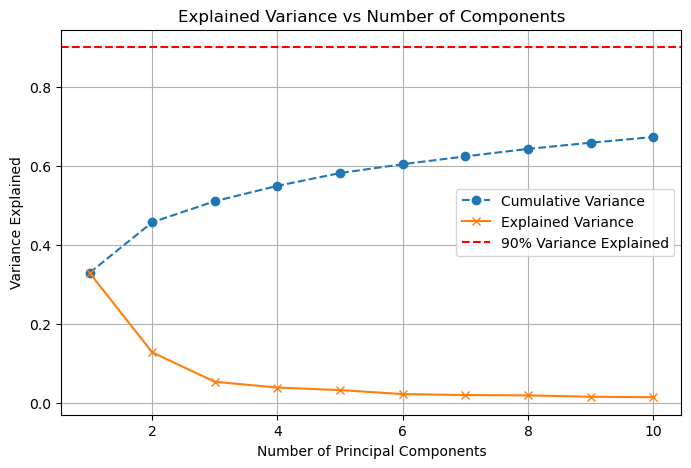

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varinace2) + 1), cumulative_variance2, marker='o', linestyle='--', label='Cumulative Variance')
plt.plot(range(1, len(varinace2) + 1), varinace2, marker='x', linestyle='-', label='Explained Variance')

plt.title('Explained Variance vs Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Explained')  # Example threshold
plt.legend()
plt.grid()
plt.show()